In [1]:
!pip install opendatasets --quiet

In [2]:
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/jsonali2003/stellar-classification-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/jsonali2003/stellar-classification-dataset


In [3]:
import pandas as pd

df = pd.read_csv("./stellar-classification-dataset/StarClassificationDataset.csv")
df.head()

C:\Users\dimac\AppData\Local\Temp\ipykernel_22580\2755710297.py:3: DtypeWarning: Columns (1,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./stellar-classification-dataset/StarClassificationDataset.csv")


,object_ID,alpha,delta,UV_filter,green_filter,red_filter,near_IR_filter,IR_filter,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,red_shift,plate_ID,MJD,fiber_ID,class
0,1.240000e+18,135.6891066,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.540000e+18,0.634794,5812,56354,171,GALAXY
1,1.240000e+18,144.8261006,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.180000e+19,0.779136,10445,58158,427,GALAXY
2,1.240000e+18,142.1887896,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.150000e+18,0.644195,4576,55592,299,GALAXY
3,1.240000e+18,338.7410378,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030000e+19,0.932346,9149,58039,775,GALAXY
4,1.240000e+18,345.2825932,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,NaN,301,3,137,6.890000e+18,0.116123,6121,56187,842,GALAXY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   object_ID       100000 non-null  float64
 1   alpha           99999 non-null   object 
 2   delta           99998 non-null   float64
 3   UV_filter       100000 non-null  float64
 4   green_filter    100000 non-null  float64
 5   red_filter      100000 non-null  float64
 6   near_IR_filter  100000 non-null  float64
 7   IR_filter       100000 non-null  float64
 8   run_ID          99994 non-null   object 
 9   rerun_ID        100000 non-null  int64  
 10  cam_col         100000 non-null  int64  
 11  field_ID        100000 non-null  int64  
 12  spec_obj_ID     100000 non-null  float64
 13  red_shift       100000 non-null  float64
 14  plate_ID        100000 non-null  int64  
 15  MJD             100000 non-null  int64  
 16  fiber_ID        100000 non-null  int64  
 17  class      

C:\Users\dimac\AppData\Local\Temp\ipykernel_22580\1600571636.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='class', data = df, palette='hls')


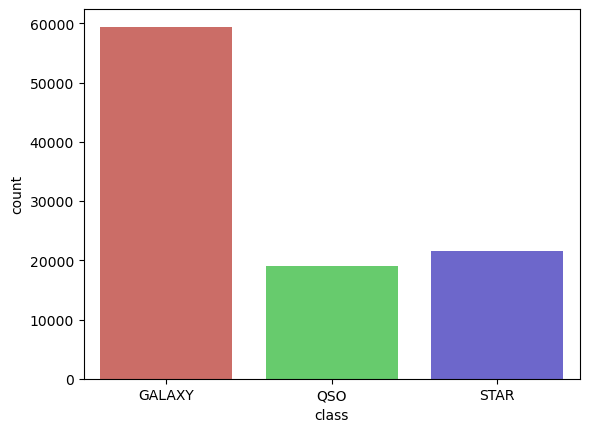

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x ='class', data = df, palette='hls')
plt.show()

In [6]:
# Удалим все объекты где есть пропуски
df.dropna(inplace=True)
# Удалим неинформативную колонку
df.drop(columns=['object_ID'], inplace=True)

# Возьмем только числовые колонки
numeric_cols = df.select_dtypes(include='number').columns
df_X = df[numeric_cols]

In [7]:
from sklearn.preprocessing import LabelEncoder

# Закодируем целевую переменную
# Создание и применение LabelEncoder
encoder = LabelEncoder()
df['class'] = encoder.fit_transform(df['class'])

# Создание словаря соответствия
label_mapping = {class_name: index for index, class_name in enumerate(encoder.classes_)}

print(label_mapping)

{'GALAXY': 0, 'QSO': 1, 'STAR': 2}


In [8]:
from sklearn.model_selection import train_test_split

X = df_X.copy()
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

print(f'Train shape: {X_train.shape}, {y_train.shape}')
print(f'Test shape: {X_test.shape}, {y_test.shape}')

Train shape: (66660, 14), (66660,)
Test shape: (33331, 14), (33331,)


In [9]:
from sklearn.neighbors import KNeighborsClassifier # классификатор
from sklearn.neighbors import KNeighborsRegressor # регрессор

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

# Список для хранения всех вариантов модели
# и метрик для каждой из них
scores = []

# переберем соседей от 3 до 16 включительно
for i in range(3, 17):
    # словарь для сохренение метрик для одной модели
    score = {}
    # создаем модель с количеством соседей i
    knn = KNeighborsClassifier(i)
    # обучаем модель
    knn.fit(X_train,y_train)
    # метод predict возвращает вектор ответов для X_test
    answers = knn.predict(X_test) 

    # Оцениваем KNN  с кол-вом сосдей i и сохраняем
    score['k'] = i
    score['accuracy'] = accuracy_score(answers,y_test)
    scores.append(score)

# вывод всех вариантов и их метрик
scores = pd.DataFrame(scores)
scores

,k,accuracy
0,3,0.689268
1,4,0.698089
2,5,0.699919
3,6,0.703279
4,7,0.703549
5,8,0.704779
6,9,0.704989
7,10,0.705949
8,11,0.707450
9,12,0.707119


In [10]:
knn = KNeighborsClassifier(15)

# обучаем
knn.fit(X_train,y_train)

# предсказываем значения
y_pred = knn.predict(X_test)

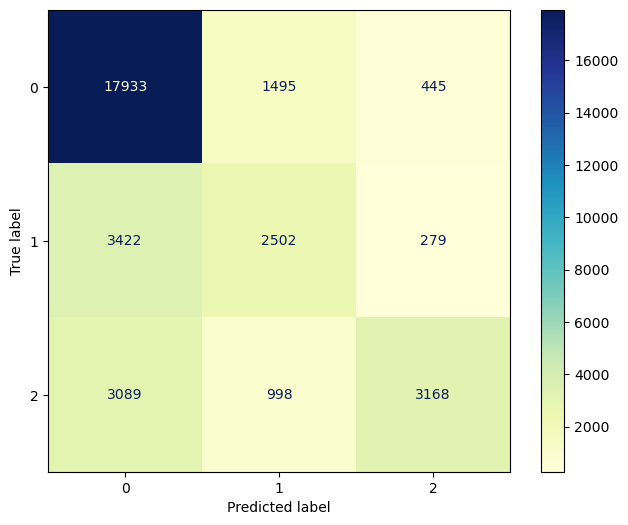

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,6), dpi=100)

display = ConfusionMatrixDisplay(conf_matrix, display_labels=knn.classes_)

display.plot(ax=ax, cmap='YlGnBu')

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Precision (по классам и усредненный)
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

print(f"Precision Macro: {precision_macro:.4f}")
print(f"Precision Micro: {precision_micro:.4f}")
print(f"Precision Weighted: {precision_weighted:.4f}")

# 3. Recall (по классам и усредненный)
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')

print(f"Recall Macro: {recall_macro:.4f}")
print(f"Recall Micro: {recall_micro:.4f}")
print(f"Recall Weighted: {recall_weighted:.4f}")

# 4. F1-score (по классам и усредненный)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"F1 Macro: {f1_macro:.4f}")
print(f"F1 Micro: {f1_micro:.4f}")
print(f"F1 Weighted: {f1_weighted:.4f}")

# 5. Матрица ошибок (Confusion Matrix)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 6. Подробный отчет по классам
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7081
Precision Macro: 0.6828
Precision Micro: 0.7081
Precision Weighted: 0.7078
Recall Macro: 0.5808
Recall Micro: 0.7081
Recall Weighted: 0.7081
F1 Macro: 0.6082
F1 Micro: 0.7081
F1 Weighted: 0.6894
Confusion Matrix:
[[17933  1495   445]
 [ 3422  2502   279]
 [ 3089   998  3168]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.81     19873
           1       0.50      0.40      0.45      6203
           2       0.81      0.44      0.57      7255

    accuracy                           0.71     33331
   macro avg       0.68      0.58      0.61     33331
weighted avg       0.71      0.71      0.69     33331



In [13]:
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0, k_neighbors=10)

columns = X.columns

os_data_X, os_data_y = os.fit_resample(X, y)
# fit()
# resample()

os_data_X = pd.DataFrame(os_data_X, columns = columns)
os_data_y = pd.DataFrame(os_data_y, columns = ['class'])

print(f'Features shape after SMOTE: {os_data_X.shape}')
print(f'Classes distribution after SMOTE:\n{os_data_y.value_counts()}')

Features shape after SMOTE: (178311, 14)
Classes distribution after SMOTE:
class
0        59437
1        59437
2        59437
Name: count, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(15)
# обучаем
knn.fit(X_train,y_train)
# предсказываем значения
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Precision (по классам и усредненный)
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')

print(f"Precision Macro: {precision_macro:.4f}")
print(f"Precision Micro: {precision_micro:.4f}")
print(f"Precision Weighted: {precision_weighted:.4f}")

# 3. Recall (по классам и усредненный)
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_weighted = recall_score(y_test, y_pred, average='weighted')

print(f"Recall Macro: {recall_macro:.4f}")
print(f"Recall Micro: {recall_micro:.4f}")
print(f"Recall Weighted: {recall_weighted:.4f}")

# 4. F1-score (по классам и усредненный)
f1_macro = f1_score(y_test, y_pred, average='macro')
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_weighted = f1_score(y_test, y_pred, average='weighted')

print(f"F1 Macro: {f1_macro:.4f}")
print(f"F1 Micro: {f1_micro:.4f}")
print(f"F1 Weighted: {f1_weighted:.4f}")

c:\Users\dimac\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.6702
Precision Macro: 0.6773
Precision Micro: 0.6702
Precision Weighted: 0.6778
Recall Macro: 0.6705
Recall Micro: 0.6702
Recall Weighted: 0.6702
F1 Macro: 0.6705
F1 Micro: 0.6702
F1 Weighted: 0.6705
